In [1]:
import pftoolbox

import pandas as pd
import numpy as np
from pftoolbox.tables import query2df
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

%run db_access.py
%run credenciales.py


¡BIENVENIDO, GUARDIÁN DEL ECOSISTEMA!



In [2]:
# dejar misma escala a los graficos de subplots,armar una torta por usuarios compradores rechazados, y rechazo pero con aprobación! 

In [3]:
#SUMAR % DE AGENTES QUE RECHAZARON LOS PAGOS, EXPIRARON, O RECHAZO MR. TAMBIEN TEMA DE SPA, ENTENDER ESO

In [4]:
desde='2021-05-01'  #'2020-05-01'
hasta='2021-06-01'   #'2020-06-01'
Seller='291898042'  #Seller de gise

In [5]:
#Nose porque este campo: spr.creation_date trae menos campos y tengo que extenderle los limites
desde2=((pd.to_datetime(desde))+dt.timedelta(days=-1)).strftime("%Y-%m-%d")
hasta2=((pd.to_datetime(hasta))+dt.timedelta(days=1)).strftime("%Y-%m-%d")

In [6]:
#Agregar if para periodo mes
Periodo='dia' 
query01= """
Select
sor.provider_id, --bastante fashuto
sor.cus_nickname,
sor.pay_status_detail_code,
sor.cus_cust_id_sel,
case when op_dol_amount <10 then '1.<10'
    when op_dol_amount<60 then '2.10-60'
    when op_dol_amount<100 then '3.60-100'
    when op_dol_amount<200 then '4.100-200'
    when op_dol_amount<350 then '5.200-350'
    when op_dol_amount<500 then '6.350-500'
    when op_dol_amount<1000 then '7.500-1000'
    else '8.>1000' end rango_M,
prod.product,
sor.pay_binary_mode_v2,
sor.stc_profile_id,
to_char(sor.creation_date,'yyyy-mm-dd') as dia,
sor.pay_try_last,
SOR.PAY_PM_TYPE_ID,
sor.pay_operation_type_id,
sor.config_id,
sor.pcc_status,
sor.INDUSTRY_ID,
sor.flag_notif_cbk,
sor.flow_type,
to_char(sum(1)) "Qtypagos",
to_char(sum(sor.PAY_TRANSACTION_DOL_AMT)) "IncomingPF" --en verdad es incoming
from SCORING.scoring_origin_report_all sor
left join OPER_MP.STG_CAP_SELLERS cap on cap.user_id=sor.cus_cust_id_sel
left join WHOWNER.BT_FRAUD_CBK_CASES cbk on cbk.payment_id=sor.pay_payment_id --MAS DETALLE GESITÓN CBK
left join whowner.LK_MP_MERCHANT_SERV_PAYMENT as prod on prod.pay_payment_id=sor.pay_payment_id
left join WHOWNER.BT_MP_PAY_PAYMENTS pp on pp.pay_payment_id=sor.pay_payment_id --PAGOS pp.pay_sponsor_id pp.pay_sponsor_id

--pp.pay_marketplace_id 
--sor.cus_cust_id_sel
where 1=1
--and sor.pcc_status in ('A','D','I')
--and PAY_PM_TYPE_ID  in ('credit_card','debit_card')
--and sor.flow_type='MI'
--and sor.config_id in ('OFF','REC')--,'TLV','POS')--'POS')--'OFF','REC','POS','TLV')
--and sor.vertical='CARTERA_ASESORADA'
--and sor.site_id in ('MLC')
and sor.creation_date>= date'"""

query03="'and sor.creation_date<= date'"
query04= "' and sor.cus_cust_id_sel  in ("
query05=") group by 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17"
query06=query01+desde+query03+hasta+query04+Seller+query05
# query06
# df2=query2df.redshift(query2,credenciales,RS_access,exclude_drop=True)
dfIn1=query2df.teradata(query06,credenciales,TERA_access,exclude_drop=True)

Total:	1 query(ies)
	0 create(s)
	1 select(s)
	0 drop(s) excluded
	0 other(s)


Tiempo:	1597.18 segs 

Output:	df con 9652 registros



,PROVIDER_ID,CUS_NICKNAME,PAY_STATUS_DETAIL_CODE,CUS_CUST_ID_SEL,rango_M,PRODUCT,PAY_BINARY_MODE_V2,STC_PROFILE_ID,dia,PAY_TRY_LAST,PAY_PM_TYPE_ID,PAY_OPERATION_TYPE_ID,CONFIG_ID,PCC_STATUS,INDUSTRY_ID,FLAG_NOTIF_CBK,FLOW_TYPE,Qtypagos,IncomingPF
0,online_payments_ca_beta,SHEINMX,cc_rejected_call_for_authorize,291898042.0,2.10-60,API,1,LOW,2021-05-13,0,credit_card,regular_payment,OFF,R,flex_default_boost,0,MI,5,156.0035
1,online_payments_ca_beta,SHEINMX,cc_rejected_insufficient_amount,291898042.0,3.60-100,API,1,LOW,2021-05-15,1,debit_card,regular_payment,OFF,R,flex_default_boost,0,MI,46,3350.8561
2,online_payments_ca_beta,SHEINMX,cc_rejected_other_reason,291898042.0,4.100-200,API,1,LOW,2021-05-11,0,credit_card,regular_payment,OFF,R,flex_default_boost,0,MI,48,7397.7471
3,online_payments_ca_beta,SHEINMX,accredited,291898042.0,7.500-1000,API,1,LOW,2021-05-13,1,credit_card,regular_payment,OFF,A,flex_default_boost,0,MI,9,6155.603
4,online_payments_ca_alpha,SHEINMX,cc_rejected_insufficient_amount,291898042.0,4.100-200,API,1,LOW,2021-05-17,1,credit_card,regular_payment,OFF,R,flex_default_boost,0,MI,4,492.1531


In [12]:
dfy=dfIn1

NameError: name 'dfIn1' is not defined

In [8]:
dfy['dia']=pd.to_datetime(dfy['dia'])
dfy['dias']=dfy['dia'].apply(lambda x: str(x))
dfy['mes']=dfy['dia'].apply(lambda x: dt.date.strftime(x,'%m'))

In [9]:
#configuro cosas de variables
dfy['IncomingPF']=dfy['IncomingPF'].apply(lambda x: float(x))
dfy['Qtypagos']=dfy['Qtypagos'].apply(lambda x: float(x))


# dfy['mes']=dfy['mes'].apply(lambda x: dt.date.strftime(x,'%m'))

dfy['STC_PROFILE_ID_2']=dfy['STC_PROFILE_ID']
dfy['Midhigh Aprobado']='MIDHIGH Aprob'
Index = dfy[(dfy['PCC_STATUS']=='A')&(dfy['STC_PROFILE_ID']=='MIDHIGH')].index 
dfy.loc[Index,'STC_PROFILE_ID_2'] = dfy.loc[Index,'Midhigh Aprobado']


In [10]:
pivot68=dfy[(dfy['PCC_STATUS']=='A')|(dfy['PCC_STATUS']=='D')].pivot_table(index=['mes'],values=['IncomingPF'],aggfunc=np.sum) #para ver cantidad, cambiar sum por size/sum
texto6=(30*pivot68.sum()/pivot68.count())/1000
texto7=int(texto6[0])

In [11]:
dfy=dfy[(dfy['FLOW_TYPE']=='MI  ')&((dfy['PAY_PM_TYPE_ID']=='debit_card')|(dfy['PAY_PM_TYPE_ID']=='credit_card'))]

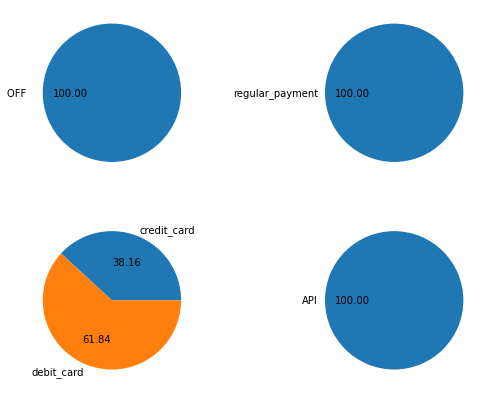

Distribución del Incoming total


In [12]:
fig1, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, sharex=True,figsize=[7,7])

# .where(dfy['dia']<'2020-10-01')
#Miro confi_id
pivot_0=dfy.pivot_table(index=['CONFIG_ID'],values=['IncomingPF'],aggfunc=np.sum) #para ver cantidad, cambiar sum por         
ax1.pie(pivot_0['IncomingPF'],labels=pivot_0.index,autopct='%.2f',center=(0,0))

#Miro pay_operation_type_id
pivot_1=dfy.pivot_table(index=['PAY_OPERATION_TYPE_ID'],values=['IncomingPF'],aggfunc=np.sum) #para ver cantidad, cambiar sum por         
ax2.pie(pivot_1['IncomingPF'],labels=pivot_1.index,autopct='%.2f',center=(1,1))


#Miro PAY_PM_TYPE_ID
pivot_2=dfy.pivot_table(index=['PAY_PM_TYPE_ID'],values=['IncomingPF'],aggfunc=np.sum) #para ver cantidad, cambiar sum por         
ax3.pie(pivot_2['IncomingPF'],labels=pivot_2.index,autopct='%.2f',center=(0,0))

#Miro PRODUCT
dfy['PRODUCT']=dfy['PRODUCT'].fillna(('N/A'))
pivot_P=dfy.pivot_table(index=['PRODUCT'],values=['IncomingPF'],aggfunc=np.sum) #para ver cantidad, cambiar sum por         
ax4.pie(pivot_P['IncomingPF'],labels=pivot_P.index,autopct='%.2f',center=(1,1))
plt.show()
print('Distribución del Incoming total') 

In [13]:
df2=dfy

In [14]:
df2['CONFIG_ID'].unique()

array(['OFF   '], dtype=object)

In [15]:
df2=df2[((df2['CONFIG_ID']=='OFF   ')|(dfy['CONFIG_ID']=='GTW   ')|(dfy['CONFIG_ID']=='REC   ')|(dfy['CONFIG_ID']=='MIS   '))]

ENTENDER INDUSTRIA

In [16]:
# pivot91=df2.pivot_table(index=['PAY_PAYMENT_ID'],columns=[Periodo],values=['IncomingPF'],aggfunc=np.sum) #para ver cantidad, cambiar sum por size/sum
# pivot91=pivot91['IncomingPF']


In [17]:
# pivot91.sum()/pivot91.isnotnull()

In [18]:
# pivot91=df2.pivot_table(index=[Periodo],columns=['PAY_PM_TYPE_ID'],values=['IncomingPF'],aggfunc=np.sum) #para ver cantidad, cambiar sum por size/sum
# pivot91=pivot91['IncomingPF']
# pivot91=pivot91.fillna(0)

# num=[]
# for n in range(pivot08.iloc[:,0].count()):
#     num.append(0)
    
  
# fig3,ax=plt.subplots(figsize=[20,5])

# for r in df2['INDUSTRY_ID'].unique():
#     ax.bar(list(pivot08.index) ,list(pivot08[r]),bottom=num,alpha=0.5,label=r)
#     num=(pivot08[r])+num
   
# plt.tick_params(labelsize = 10,length=5,axis='x',labelrotation=0)
# plt.title('INDUSTRIA:IncomingPF (Td)')
# plt.legend(loc=(1,0), frameon=False, title='Legend') # add a legend (uses the labels from plt.scatter)
# plt.grid(axis='y')

# abs_values = pivot08.values
# rel_values = abs_values / abs_values.sum(axis=1, keepdims=True) * 100

# labels = zip(abs_values.T.flatten(), rel_values.T.flatten())

# for path in ax.patches:
#     abs_value, rel_value = next(labels)
#     if (rel_value>5):
#         label = f"{round(rel_value,0):.0f}"
#         width, height = path.get_width(), path.get_height()
#         x, y = path.get_xy() 
#         ax.text(x=x + width / 2, 
#                 y=y + height / 2, 
#                 s=label,
#                 horizontalalignment='center', 
#                 verticalalignment='center',fontsize=8,alpha=0.6
#                 )

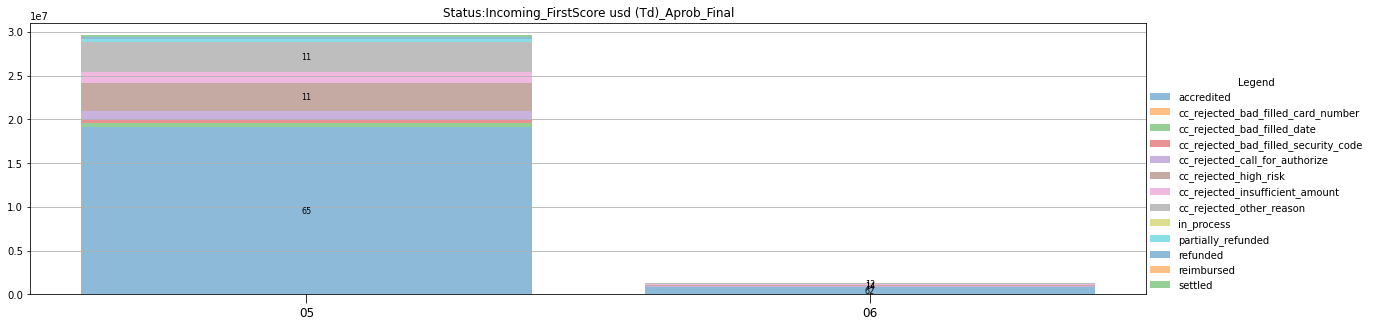

In [19]:
df4=df2

# [df4['PAY_STATUS_DETAIL_CODE']!='accredited']
pivot11=df4.pivot_table(index=['mes'],columns=['PAY_STATUS_DETAIL_CODE'],values=['IncomingPF'],aggfunc=np.sum) #para ver cantidad, cambiar sum por size
pivot11=pivot11['IncomingPF']
pivot11=pivot11.fillna(0)
# (df4['FLAG_NOTIF_CBK']==1)
# ver por TPN

num=[]
for n in range(pivot11.iloc[:,0].count()):
    num.append(0)
    
fig4,ax=plt.subplots(figsize=[20,5])
    
for r in pivot11.columns:
    ax.bar(list(pivot11.index) ,pivot11[r],bottom=num,alpha=0.5,label=r)
    num=(pivot11[r])+num

plt.tick_params(labelsize = 12,length=9,axis='x',labelrotation=0)
plt.title('Status:Incoming_FirstScore usd (Td)_Aprob_Final')
plt.legend(loc=(1,0), frameon=False, title='Legend') # add a legend (uses the labels from plt.scatter)
plt.grid(axis='y')

abs_values = pivot11.values
rel_values = abs_values / abs_values.sum(axis=1, keepdims=True) * 100

labels = zip(abs_values.T.flatten(), rel_values.T.flatten())
a=0
for path in ax.patches:
    a=a+1
    abs_value, rel_value = next(labels)
    if (rel_value>5):
        label = f"{round(rel_value,0):.0f}"
        width, height = path.get_width(), path.get_height()
        x, y = path.get_xy() 
#         if(a % 2 == 0):        
        ax.text(x=x + width / 2, y=y + height / 2, s=label,horizontalalignment='center', verticalalignment='center',fontsize=8) 

In [20]:
# Dejo de trabajar con rechazo bancario
df2=df2[(df2['PCC_STATUS']=='A')|(df2['PCC_STATUS']=='I')|(df2['PCC_STATUS']=='D')]

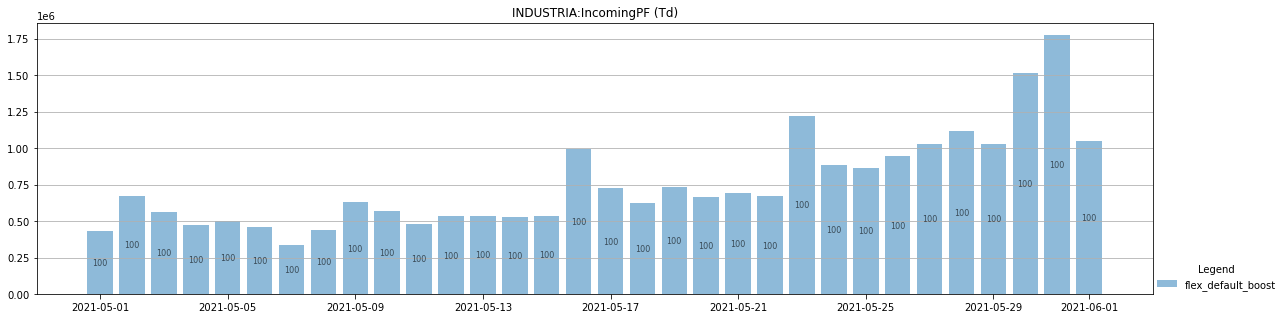

In [21]:
pivot08=df2.pivot_table(index=['dia'],columns=['INDUSTRY_ID'],values=['IncomingPF'],aggfunc=np.sum) #para ver cantidad, cambiar sum por size/sum
pivot08=pivot08['IncomingPF']
pivot08=pivot08.fillna(0)

num=[]
for n in range(pivot08.iloc[:,0].count()):
    num.append(0)
    
  
fig3,ax=plt.subplots(figsize=[20,5])

for r in df2['INDUSTRY_ID'].unique():
    ax.bar(list(pivot08.index) ,list(pivot08[r]),bottom=num,alpha=0.5,label=r)
    num=(pivot08[r])+num
   
plt.tick_params(labelsize = 10,length=5,axis='x',labelrotation=0)
plt.title('INDUSTRIA:IncomingPF (Td)')
plt.legend(loc=(1,0), frameon=False, title='Legend') # add a legend (uses the labels from plt.scatter)
plt.grid(axis='y')

abs_values = pivot08.values
rel_values = abs_values / abs_values.sum(axis=1, keepdims=True) * 100

labels = zip(abs_values.T.flatten(), rel_values.T.flatten())

for path in ax.patches:
    abs_value, rel_value = next(labels)
    if (rel_value>5):
        label = f"{round(rel_value,0):.0f}"
        width, height = path.get_width(), path.get_height()
        x, y = path.get_xy() 
        ax.text(x=x + width / 2, 
                y=y + height / 2, 
                s=label,
                horizontalalignment='center', 
                verticalalignment='center',fontsize=8,alpha=0.6
                )

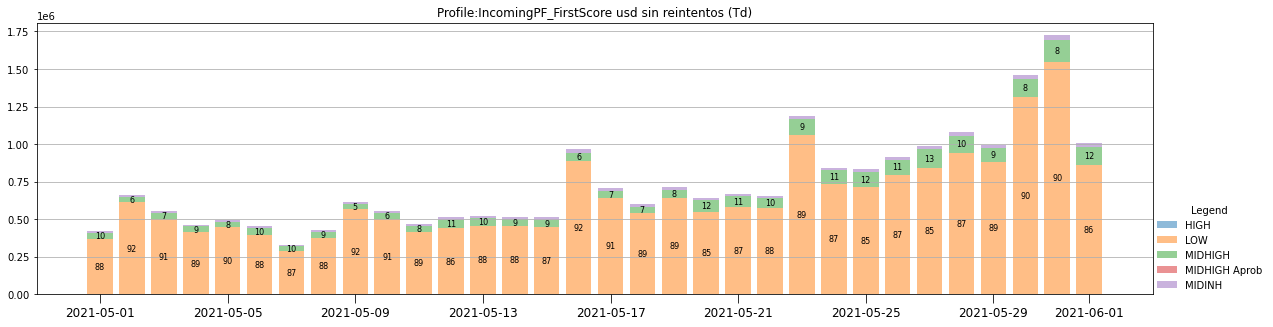

In [22]:
# Perfil por TPV en First Score
# [(df2['INDUSTRY_ID']!='default')&(df2['mes']=='11')] &(df2['STC_PROFILE_ID']!='LOW')
pivot07=df2[(df2['PAY_TRY_LAST']==1)].pivot_table(index=['dia'],columns=['STC_PROFILE_ID_2'],values=['IncomingPF'],aggfunc=np.sum) #para ver cantidad, cambiar sum por size
pivot07=pivot07['IncomingPF']
pivot07=pivot07.fillna(0)
# (df2['FLAG_NOTIF_CBK']==1)
# ver por TPN

num=[]
for n in range(pivot07.iloc[:,0].count()):
    num.append(0)
    
fig4,ax=plt.subplots(figsize=[20,5])
    
for r in pivot07.columns:
    ax.bar(list(pivot07.index) ,pivot07[r],bottom=num,alpha=0.5,label=r)
    num=(pivot07[r])+num

plt.tick_params(labelsize = 12,length=9,axis='x',labelrotation=0)
plt.title('Profile:IncomingPF_FirstScore usd sin reintentos (Td)')
plt.legend(loc=(1,0), frameon=False, title='Legend') # add a legend (uses the labels from plt.scatter)
plt.grid(axis='y')

abs_values = pivot07.values
rel_values = abs_values / abs_values.sum(axis=1, keepdims=True) * 100

labels = zip(abs_values.T.flatten(), rel_values.T.flatten())
a=0
for path in ax.patches:
    a=a+1
    abs_value, rel_value = next(labels)
    if (rel_value>5):
        label = f"{round(rel_value,0):.0f}"
        width, height = path.get_width(), path.get_height()
        x, y = path.get_xy() 
#         if(a % 2 == 0):        
        ax.text(x=x + width / 2, y=y + height / 2, s=label,horizontalalignment='center', verticalalignment='center',fontsize=8) 

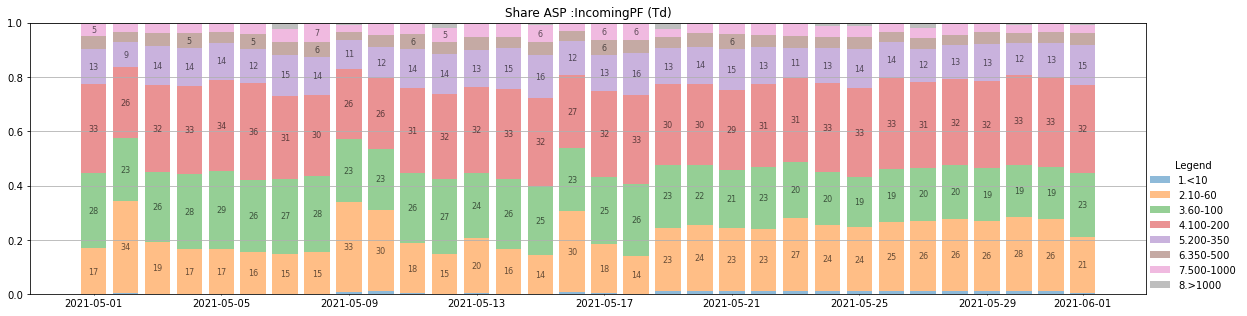

In [23]:
pivot10=df2.pivot_table(index=['dia'],columns=['rango_M'],values=['IncomingPF'],aggfunc=np.sum) #para ver cantidad, cambiar sum por size/sum
pivot10=pivot10['IncomingPF']

#quitar las proximas 3 lineas y deja de verse con barras del 100% y se ve en usd nominal
for i in range(int(len(pivot10))):
                    aux4=pivot10.iloc[i,:].sum()
                    for j in range(int(len(pivot10.columns))):
                        pivot10.iloc[i,j]=pivot10.iloc[i,j]/(aux4)


pivot10=pivot10.fillna(0)

num=[]
for n in range(pivot10.iloc[:,0].count()):
    num.append(0)
    
fig55,ax=plt.subplots(figsize=[20,5])

for r in sorted(df2['rango_M'].unique()):
    ax.bar(list(pivot10.index) ,list(pivot10[r]),bottom=num,alpha=0.5,label=r)
    num=(pivot10[r])+num
   
plt.tick_params(labelsize = 10,length=1,axis='x') #labelrotation=90
plt.title('Share ASP :IncomingPF (Td)')
plt.legend(loc=(1,0), frameon=False, title='Legend') # add a legend (uses the labels from plt.scatter)
plt.grid(axis='y')
# plt.xticks(np.arange(0,2,int(len(pivot10))),(pivot10.index))

abs_values = pivot10.values
rel_values = pivot10.values

labels = zip(abs_values.T.flatten(), rel_values.T.flatten())

for path in ax.patches:
    abs_value, rel_value = next(labels)
    label = f"{round(rel_value*100,0):.0f}"
    if (rel_value*100>5):  
        width, height = path.get_width(), path.get_height()
        x, y = path.get_xy() 
        ax.text(x=x + width / 2, y=y + height / 2, s=label,horizontalalignment='center',verticalalignment='center',fontsize=8,alpha=0.6)

In [24]:
print('ASP:')
df2['IncomingPF'].sum()/df2['Qtypagos'].sum()

ASP:


70.94125445794553

In [25]:
query10= """
Select
config_id,
to_char(so.creation_date,'yyyy-mm-dd') as dia,
st.tree_id,
st.tree_version_id,
so.last_node,
node_id,
node_version_id,
so.profile_id,
pcc_status,
(sum(so.op_dol_amount)) TPV
from  fraud.public.scoring_origin_mi_latest so
left join scoring.scoring_provider_result spr on so.scoring_id=spr.scoring_id and so.provider_id = spr.scoring_provider
left join scoring.scoring_tree_version st on st.scoring_id = spr.external_id and so.site_id = st.site_id
left join scoring.hypothesis_tree_node htn on htn.tree_id = st.tree_id and htn.tree_version_id = st.tree_version_id and htn.site_id = st.site_id and htn.node_position = trunc(so.last_node/2)

where 1=1
--and so.site_id in ('MLC')
--and so.config_id in ('OFF')--,'GTW','REC')
--and so.pcc_status in ('A','D','I')
--and so.tree_name in ('ONLINE_PAYMENTS_CA_BETA','STRONG_RULES')
--and so.industry_id in ('flex_default_boost','coupons','tickets','deviated_sellers')--,'flex_default')--,'flex_default_boost','coupons','tickets','flex_default') --La forma de definir Cartera Asesorada y Long Tail
and so.receiver_id  in (

"""
query11=""") and so.creation_date>='"""
query12="""' and spr.creation_date>='"""
query13="""' and st.op_timestamp>='"""
query14="' group by 1,2,3,4,5,6,7,8,9"

query=query10+Seller+query11+desde2+query12+desde2+query13+desde2+query14

df01=query2df.redshift(query,credenciales,RS_access,exclude_drop=True)
# dfIn=query2df.teradata(query,credenciales,TERA_access,exclude_drop=True)

Total:	1 query(ies)
	0 create(s)
	1 select(s)
	0 drop(s) excluded
	0 other(s)


Tiempo:	60.38 segs 

Output:	df con 1548 registros



,config_id,dia,tree_id,tree_version_id,last_node,node_id,node_version_id,profile_id,pcc_status,tpv
0,OFF,2021-05-22,STRONG_RULES_OFF_VECT,94,6.0,AML_SANCTIONS_LIST_BLOCK,8.0,MIDINH,I,116.87
1,OFF,2021-05-07,STRONG_RULES_OFF_VECT,94,6.0,AML_SANCTIONS_LIST_BLOCK,8.0,MIDINH,I,113.54
2,OFF,2021-05-13,STRONG_RULES_OFF_VECT,94,6.0,AML_SANCTIONS_LIST_BLOCK,8.0,MIDINH,I,183.66
3,OFF,2021-05-30,STRONG_RULES_OFF_VECT,94,6.0,AML_SANCTIONS_LIST_BLOCK,8.0,MIDINH,I,123.58
4,OFF,2021-05-18,STRONG_RULES_OFF_VECT,94,6.0,AML_SANCTIONS_LIST_BLOCK,8.0,MIDINH,I,61.90


In [26]:
df=df01

In [27]:
df['dia']=pd.to_datetime(df['dia'])
df['dias']=df['dia'].apply(lambda x: str(x))
df['mes']=df['dia'].apply(lambda x: dt.date.strftime(x,'%m'))

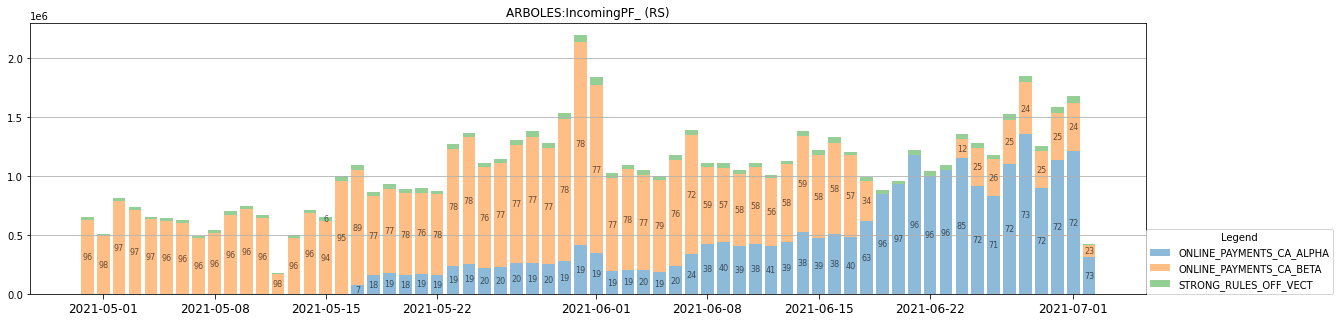

In [35]:
#ALGO ANDA MAL. LOS VALORES SE AMONTONAN UNOS ARRIBA DE OTROS

pivot34=df.pivot_table(index=['dia'],columns=['tree_id'],values=['tpv'],aggfunc=np.sum) #para ver cantidad, cambiar sum por 
pivot34=pivot34['tpv']
pivot34=pivot34.fillna(0)

for y in pivot34.columns:
    pivot34[y]=pivot34[y].apply(lambda x:float(x))
# pivot['IS_BIN_UNDER_ATTACK_MLA']=pivot['IS_BIN_UNDER_ATTACK_MLA'].apply(lambda x:float(x))
# pivot['USER_IN_BLACKLIST']=pivot['USER_IN_BLACKLIST'].apply(lambda x:float(x))

num=[]
for n in range(pivot34.iloc[:,0].count()):
    num.append(0)

fig5,ax=plt.subplots(figsize=[20,5])
for r in pivot34.columns:
    ax.bar((pivot34.index) ,pivot34[r],bottom=num,alpha=0.5,label=r)
    num=(pivot34[r])+num


plt.tick_params(labelsize = 12,length=5,axis='x',labelrotation=0)
plt.title('ARBOLES:IncomingPF_ (RS)')
plt.legend(loc=(1,0), frameon=True, title='Legend') # add a legend (uses the labels from plt.scatter)
plt.grid(axis='y')

abs_values = pivot34.values
rel_values = abs_values / abs_values.sum(axis=1, keepdims=True) * 100

labels = zip(abs_values.T.flatten(), rel_values.T.flatten())
a=0
for path in ax.patches:
    a=a+1
    abs_value, rel_value = next(labels)
    if (rel_value>5):
        label = f"{round(rel_value,0):.0f}"
        width, height = path.get_width(), path.get_height()
        x, y = path.get_xy() 
#         if(a % 2 == 0):        
        ax.text(x=x + width / 2, y=y + height / 2, s=label,horizontalalignment='center', verticalalignment='center',fontsize=8,alpha=0.6)

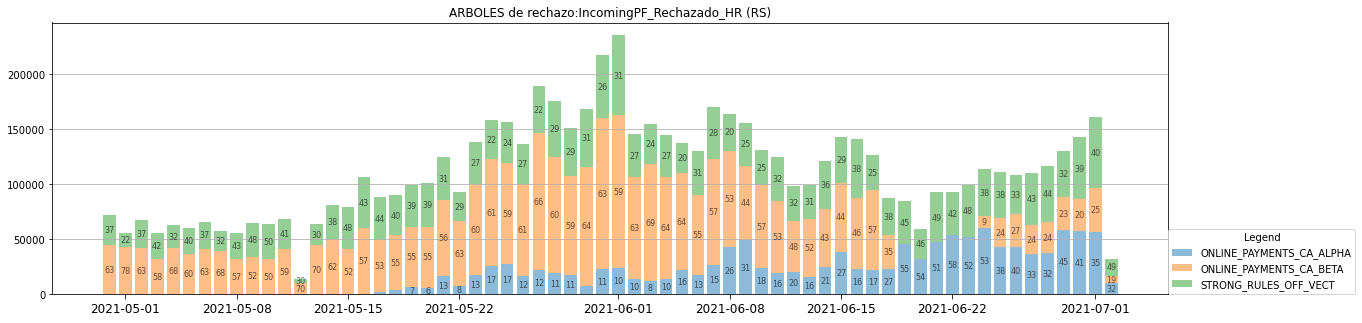

In [29]:
import numpy as np

#&(df['dia']>'2021-02-01')

pivot30=df[(df['profile_id']!='LOW')].pivot_table(index=['dia'],columns=['tree_id'],values=['tpv'],aggfunc=np.sum) #para ver cantidad, cambiar sum por 
pivot30=pivot30['tpv']
pivot30=pivot30.fillna(0)


for y in pivot30.columns:
    pivot30[y]=pivot30[y].apply(lambda x:float(x))

num=[]
for n in range(pivot30.iloc[:,0].count()):
    num.append(0)


fig6,ax=plt.subplots(figsize=[20,5])
for r in pivot30.columns:
    ax.bar((pivot30.index) ,(pivot30[r]),bottom=num,alpha=0.5,label=r)
    num=(pivot30[r])+num


# ax.bar(list(pivot30.index) ,list(pivot30['ONLINE_PAYMENTS_CA_BETA']),bottom=list(pivot30['STRONG_RULES_OFF']),label=2)
# ax.bar(list(pivot30.index) ,list(pivot30['ONLINE_PAYMENTS_CA_ALPHA']),bottom=list(pivot30['STRONG_RULES_OFF']+pivot30['ONLINE_PAYMENTS_CA_BETA']),label=3)

plt.tick_params(labelsize = 12,length=5,axis='x',labelrotation=0)
plt.title('ARBOLES de rechazo:IncomingPF_Rechazado_HR (RS)')
plt.legend(loc=(1,0), title='Legend') # add a legend (uses the labels from plt.scatter)
plt.grid(axis='y')

abs_values = pivot30.values
rel_values = abs_values / abs_values.sum(axis=1, keepdims=True) * 100

labels = zip(abs_values.T.flatten(), rel_values.T.flatten())
a=0
for path in ax.patches:
    a=a+1
    abs_value, rel_value = next(labels)
    if (rel_value>5):
        label = f"{round(rel_value,0):.0f}"
        width, height = path.get_width(), path.get_height()
        x, y = path.get_xy() 
#         if(a % 2 == 0):        
        ax.text(x=x + width / 2, y=y + height / 2, s=label,horizontalalignment='center', verticalalignment='center',fontsize=8,alpha=0.6)

In [30]:
# 18/01 empezo (10%) 23/2 mas flujo (30%) 16/3 (50%) &(df['config_id']=='REC')

#&(df['dia']!='2020-12-31')
pivot=df[((df['profile_id']!='LOW'))].pivot_table(index=['mes'],columns=['node_id'],values=['tpv'],aggfunc=np.sum) #para ver cantidad, cambiar sum por 
pivot=pivot['tpv']
pivot=pivot.fillna(0)

for y in pivot.columns:
    pivot[y]=pivot[y].apply(lambda x:float(x))


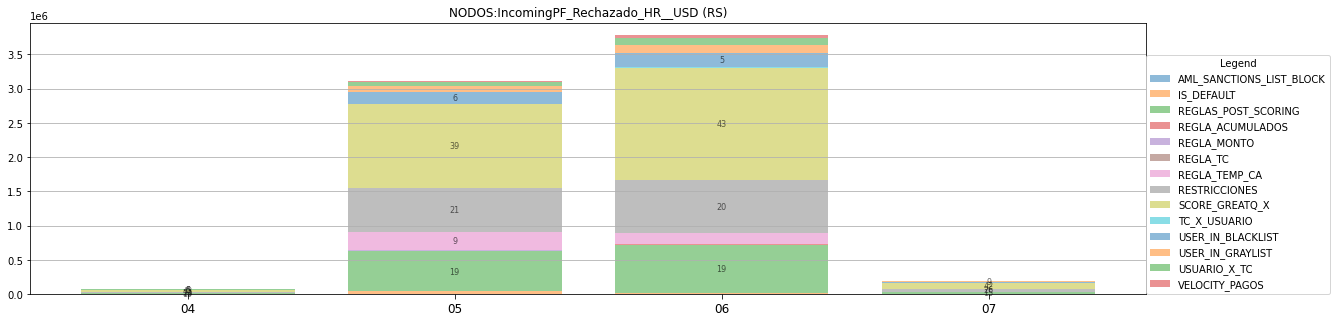

In [31]:
num=[]
for n in range(pivot.iloc[:,0].count()):
    num.append(0)


fig7,ax=plt.subplots(figsize=[20,5])
for r in pivot.columns:
    ax.bar((pivot.index) ,pivot[r],bottom=num,alpha=0.5,label=r)
    num=(pivot[r])+num
 

plt.tick_params(labelsize = 12,length=5,axis='x',labelrotation=0)
plt.title('NODOS:IncomingPF_Rechazado_HR__USD (RS)')
plt.legend(loc=(1,0), frameon=True, title='Legend') # add a legend (uses the labels from plt.scatter)
# plt.savefig(Seller+Periodo+desde, bbox_inches='tight') Exportar foto
plt.grid(axis='y')


abs_values = pivot.values
rel_values = abs_values / abs_values.sum(axis=1, keepdims=True) * 100


labels = zip(abs_values.T.flatten(), rel_values.T.flatten())
a=0
for path in ax.patches:
    a=a+1
    abs_value, rel_value = next(labels)
    if (rel_value>5):
        label = f"{round(rel_value,0):.0f}"
        width, height = path.get_width(), path.get_height()
        x, y = path.get_xy() 
#         if(a % 2 == 0):        
        ax.text(x=x + width / 2, y=y + height / 2, s=label,horizontalalignment='center', verticalalignment='center',fontsize=8,alpha=0.6)


In [32]:
# #EXPORTAR REDSHIFT

# import os
# from pandas import ExcelWriter
# from openpyxl import load_workbook

# #Creo archivo
# ruta4 = "C:/Users/mgaona/Desktop/Analisis/base python/RED1"+desde+hasta+".xlsx" 

# #Ingreso las bases a hojas al archivo
# df01.to_excel(ruta4, index=True)

# Cuando exporte, agregar la query en el excel!!!!

In [33]:
# # EXPORTAR TERA

# import os
# from pandas import ExcelWriter
# from openpyxl import load_workbook


# #Creo archivo
# ruta3 = "C:/Users/mgaona/Desktop/Analisis/base python/TERA1 "+dfIn1['CUS_NICKNAME'].loc[1:1]+desde+hasta+".xlsx" 
# # ruta4 = "C:/Users/mgaona/Desktop/Analisis/base python/RED"+Seller+desde+hasta+".xlsx" 

# #Ingreso las bases a hojas al archivo
# dfIn1.to_excel(ruta3, index=False)
# # df01.to_excel(ruta4, index=False)

# Cuando exporte, agregar la query en el excel!!!!
